<a href="https://colab.research.google.com/github/KerwinFuyihang/blockchain_analysis/blob/main/experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import matplotlib.pyplot as plt

# List all available Matplotlib styles
print(plt.style.available)

# Set the style to 'seaborn-white' for a clean look
plt.style.use('seaborn-white')

# Set font and font size globally using rcParams
plt.rcParams.update({
    'font.family': 'DejaVu Serif',  # Set the font family to DejaVu Serif
    'font.size': 10,  # Set the font size to 10 for better readability in two-column formats
    'text.color': 'black',  # Ensure text color is black for better contrast
    'axes.facecolor': 'white',  # Set the axes background color to white
    'figure.facecolor': 'white',  # Set the figure background color to white
    'axes.edgecolor': 'black',  # Set the axes edge color to black
})

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<ipython-input-2-0fecd1474f1c>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


# Scalability -- Transaction

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chengnanyimeng/blockchain_analysis/main/Beacon_chain_data_converted/daily_transactions_converted.csv')

In [7]:
df1

,Timestamp,Value
0,2015-07-30 08:00:00,0
1,2015-07-31 08:00:00,0
2,2015-08-01 08:00:00,0
3,2015-08-02 08:00:00,0
4,2015-08-03 08:00:00,0
...,...,...
2950,2023-08-31 08:00:00,1010343
2951,2023-09-01 08:00:00,1005894
2952,2023-09-02 08:00:00,1024199
2953,2023-09-03 08:00:00,1039218


<ipython-input-19-03312518475c>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


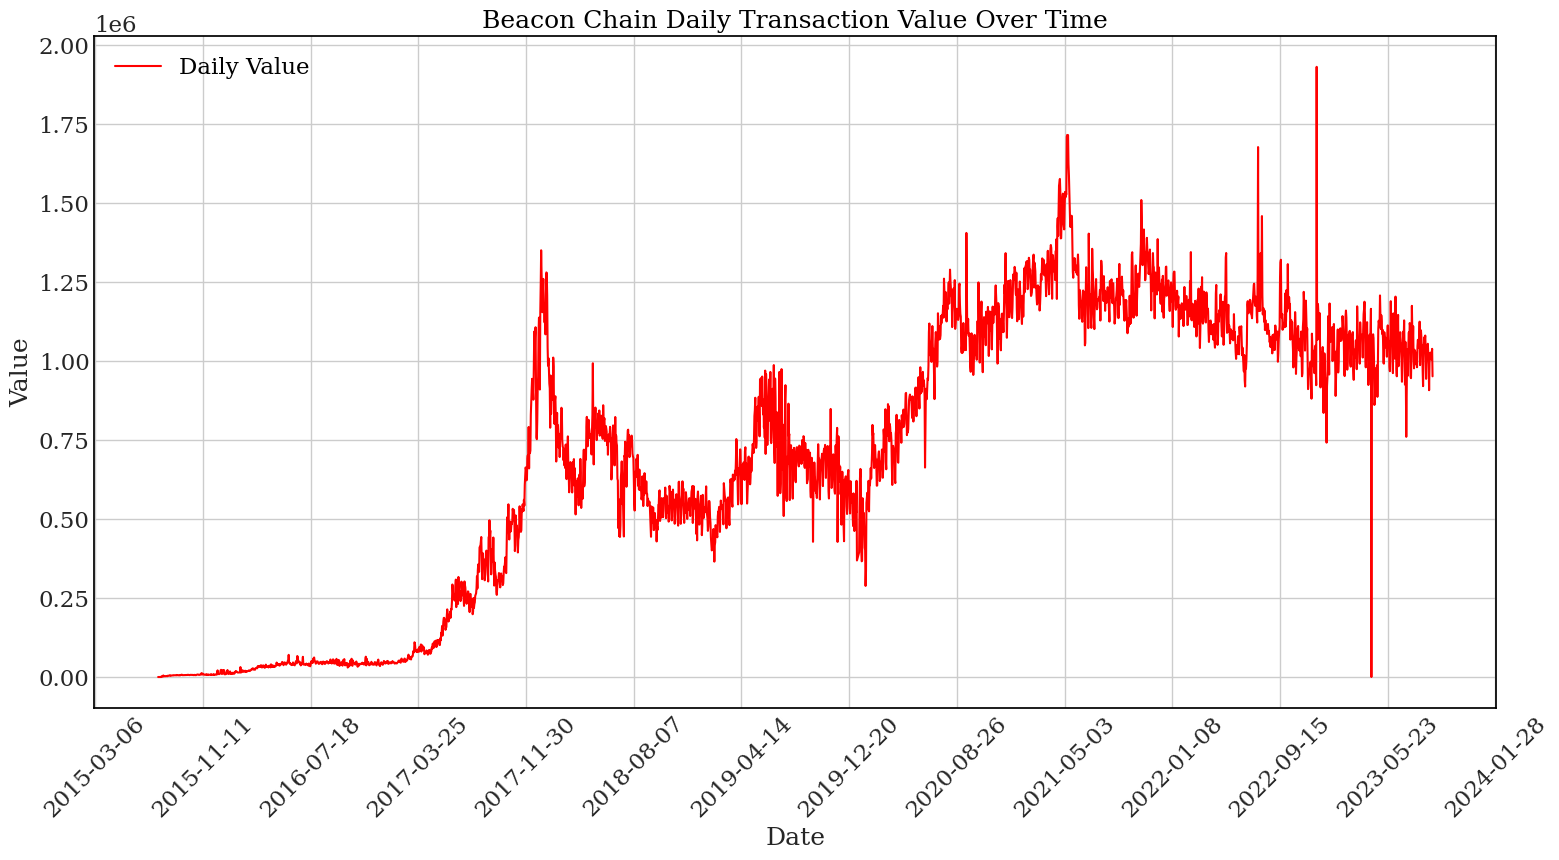

In [19]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])  # Ensure 'Timestamp' is in datetime format
df1['Date'] = df1['Timestamp'].dt.date  # Extract date part only

# Set the style to 'seaborn-white' for a clean look
plt.style.use('seaborn-white')
plt.rcParams.update({
    'font.family': 'DejaVu Serif',  # Set the font family to DejaVu Serif
    'font.size': 20,  # Set the font size to 20 for better readability
    'text.color': 'black',  # Ensure text color is black for better contrast
    'axes.facecolor': 'white',  # Set the axes background color to white
    'figure.facecolor': 'white',  # Set the figure background color to white
    'axes.edgecolor': 'black',  # Set the axes edge color to black
})

# Create the time series plot
plt.figure(figsize=(16, 9))
plt.plot(df1['Date'], df1['Value'], label='Daily Value', color='red')

# Customize the plot
plt.title('Beacon Chain Daily Transaction Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # Show only up to 10 major ticks

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and save
plt.tight_layout()
plt.savefig('Beacon_daily_transaction.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()

In [10]:
df2 = pd.read_csv('https://raw.githubusercontent.com/chengnanyimeng/blockchain_analysis/main/Algorand_data/al_transac_data_count_fee.csv', names=["Time", "Value1", "Value2"])

In [11]:
df2

,Time,Value1,Value2
0,"{""date"":""2019-07-01""}",1873,2.103405
1,"{""date"":""2019-07-02""}",2669,3.630285
2,"{""date"":""2019-07-03""}",2205,3.871633
3,"{""date"":""2019-07-04""}",2575,4.271765
4,"{""date"":""2019-07-05""}",2847,4.038160
...,...,...,...
1418,"{""date"":""2023-05-19""}",361320,462.395295
1419,"{""date"":""2023-05-20""}",382287,508.614302
1420,"{""date"":""2023-05-21""}",357887,465.822375
1421,"{""date"":""2023-05-22""}",383809,503.025569


<ipython-input-21-f50d4dd7741d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


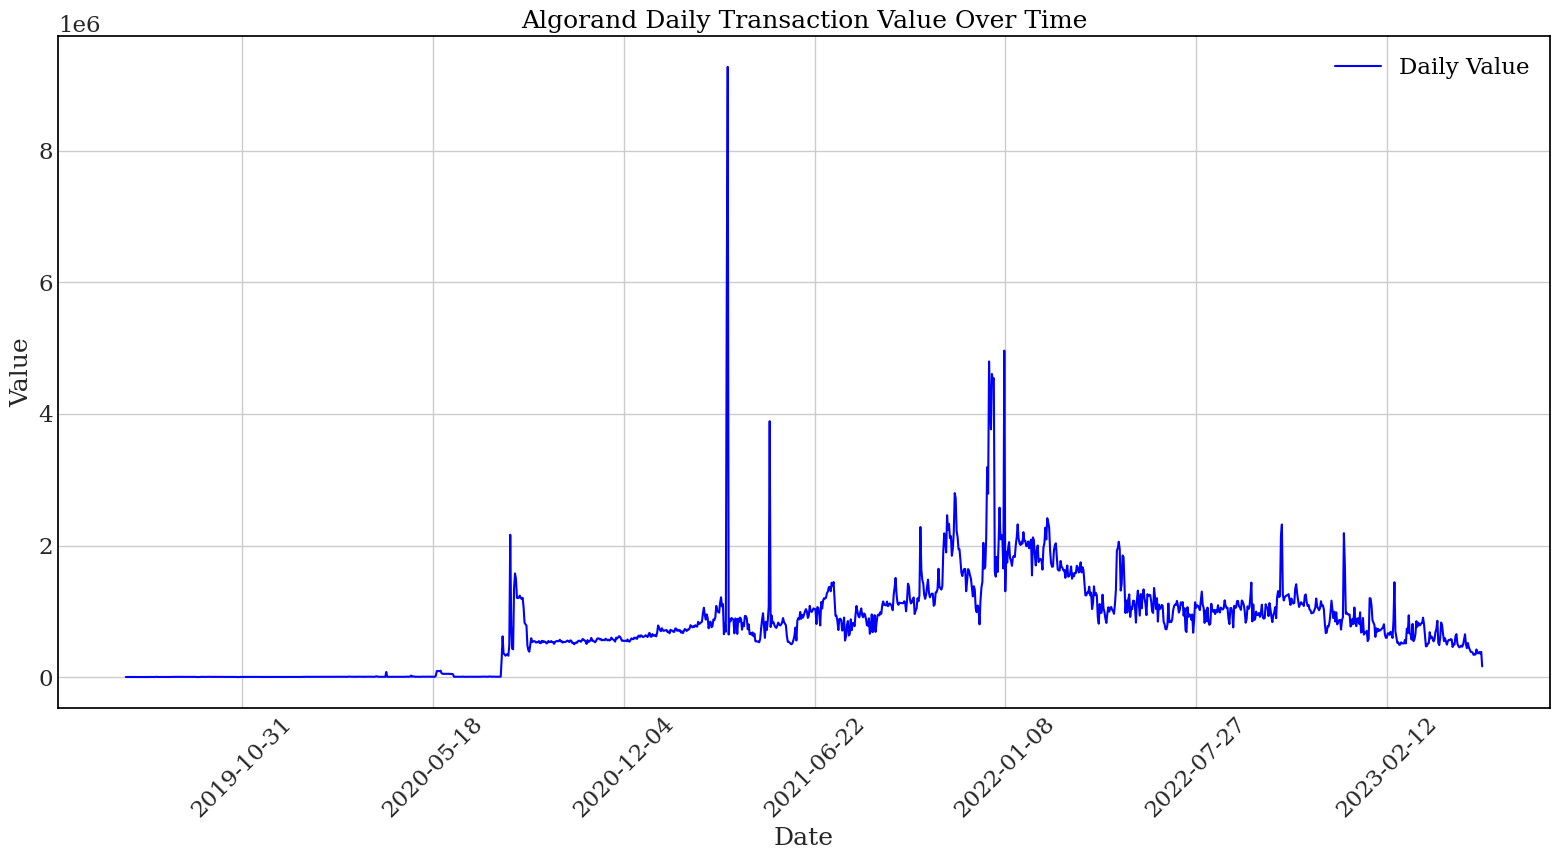

In [21]:
import json
# Parse the 'Time' column
df2['Date'] = df2['Time'].apply(lambda x: json.loads(x)['date'])
df2['Date'] = pd.to_datetime(df2['Date'])  # Convert to datetime format

# Set the style to 'seaborn-white' for a clean look
plt.style.use('seaborn-white')
plt.rcParams.update({
    'font.family': 'DejaVu Serif',  # Set the font family to DejaVu Serif
    'font.size': 20,  # Set the font size to 20 for better readability
    'text.color': 'black',  # Ensure text color is black for better contrast
    'axes.facecolor': 'white',  # Set the axes background color to white
    'figure.facecolor': 'white',  # Set the figure background color to white
    'axes.edgecolor': 'black',  # Set the axes edge color to black
})

# Create the time series plot
plt.figure(figsize=(16, 9))
plt.plot(df2['Date'], df2['Value1'], label='Daily Value', color='blue')

# Customize the plot
plt.title('Algorand Daily Transaction Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Show only up to 10 major ticks

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and save
plt.tight_layout()
plt.savefig('Algorand_daily_transaction.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()

# Scalability -- Latency

In [22]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chengnanyimeng/blockchain_analysis/main/Beacon_chain_data_converted/avg_blk_time_converted.csv')
df3

,Timestamp,Value
0,2015/7/30 8:00,4.46
1,2015/7/31 8:00,12.58
2,2015/8/1 8:00,16.34
3,2015/8/2 8:00,16.12
4,2015/8/3 8:00,16.37
...,...,...
2950,2023/8/31 8:00,12.09
2951,2023/9/1 8:00,12.10
2952,2023/9/2 8:00,12.13
2953,2023/9/3 8:00,12.09


In [25]:
average_value = df3['Value'].mean()
average_value

14.421512690355327

<ipython-input-27-e4834ff6c48a>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


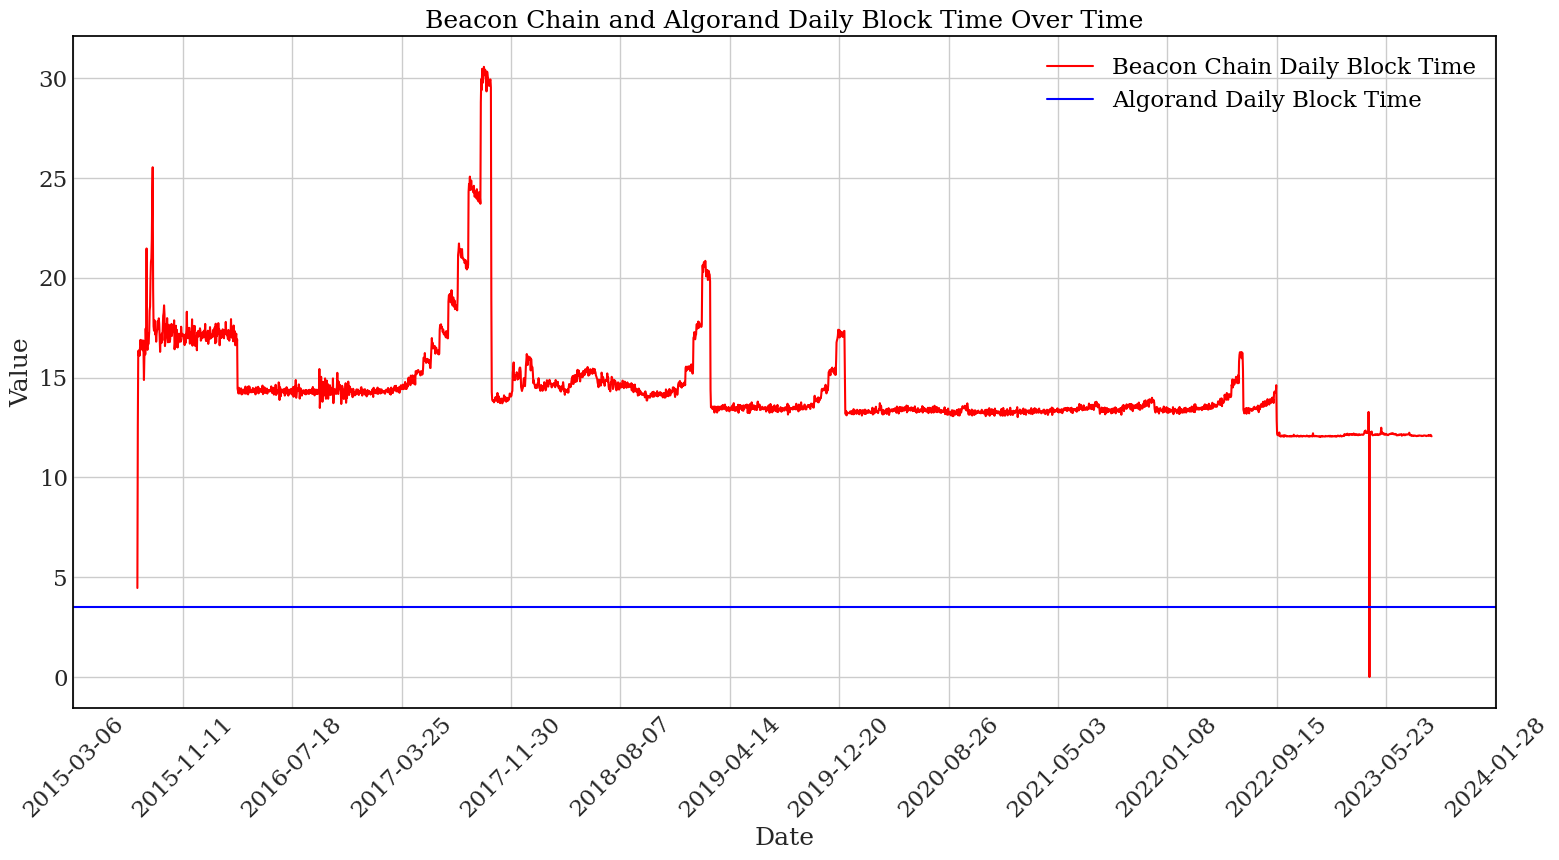

In [27]:
# Convert 'Timestamp' to datetime format
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'], format='%Y/%m/%d %H:%M')
df3['Date'] = df3['Timestamp'].dt.date  # Extract date part only

# Calculate the average value
average_value = df3['Value'].mean()

# Set the style to 'seaborn-white' for a clean look
plt.style.use('seaborn-white')
plt.rcParams.update({
    'font.family': 'DejaVu Serif',  # Set the font family to DejaVu Serif
    'font.size': 20,  # Set the font size to 20 for better readability
    'text.color': 'black',  # Ensure text color is black for better contrast
    'axes.facecolor': 'white',  # Set the axes background color to white
    'figure.facecolor': 'white',  # Set the figure background color to white
    'axes.edgecolor': 'black',  # Set the axes edge color to black
})

# Create the time series plot
plt.figure(figsize=(16, 9))
plt.plot(df3['Date'], df3['Value'], label='Beacon Chain Daily Block Time', color='red')


# Add a line at y = 3.5
plt.axhline(y=3.5, color='blue', label='Algorand Daily Block Time')

# Customize the plot
plt.title('Beacon Chain and Algorand Daily Block Time Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # Show only up to 15 major ticks

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and save
plt.tight_layout()
plt.savefig('Beacon_Algorand_daily_block_time.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()

In [34]:
df_4 = pd.read_csv('https://raw.githubusercontent.com/chengnanyimeng/blockchain_analysis/main/Beacon_chain_data_converted/burned_fees_converted.csv')
df_4

,Timestamp,Value
0,2021-08-02 08:00:00,0.00
1,2021-08-03 08:00:00,0.00
2,2021-08-04 08:00:00,0.00
3,2021-08-05 08:00:00,3053.80
4,2021-08-06 08:00:00,4106.96
...,...,...
759,2023-08-31 08:00:00,2355.61
760,2023-09-01 08:00:00,1912.31
761,2023-09-02 08:00:00,1292.53
762,2023-09-03 08:00:00,1284.49


In [36]:
avg = df_4['Value'].mean()
avg

4690.362787958115

<ipython-input-38-13f70c1ae62f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


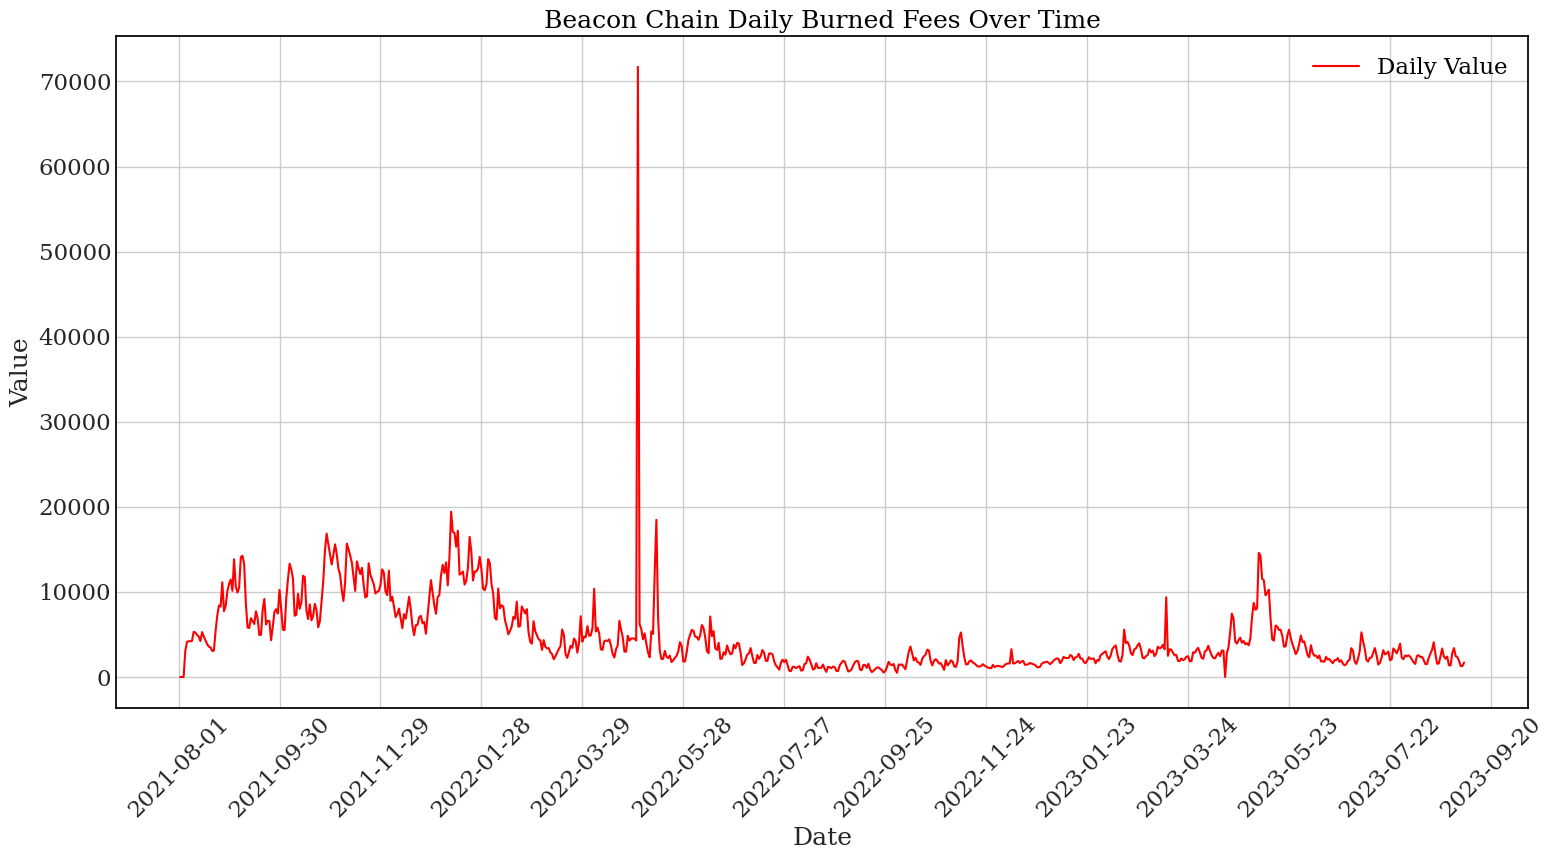

In [38]:
# Convert 'Timestamp' to datetime format
df_4['Timestamp'] = pd.to_datetime(df_4['Timestamp'], format='%Y-%m-%d %H:%M:%S')
df_4['Date'] = df_4['Timestamp'].dt.date  # Extract date part only

# Set the style to 'seaborn-white' for a clean look
plt.style.use('seaborn-white')
plt.rcParams.update({
    'font.family': 'DejaVu Serif',  # Set the font family to DejaVu Serif
    'font.size': 20,  # Set the font size to 20 for better readability
    'text.color': 'black',  # Ensure text color is black for better contrast
    'axes.facecolor': 'white',  # Set the axes background color to white
    'figure.facecolor': 'white',  # Set the figure background color to white
    'axes.edgecolor': 'black',  # Set the axes edge color to black
})

# Create the time series plot
plt.figure(figsize=(16, 9))
plt.plot(df_4['Date'], df_4['Value'], label='Daily Value', color='red')

# Customize the plot
plt.title('Beacon Chain Daily Burned Fees Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # Show only up to 15 major ticks

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and save
plt.tight_layout()
plt.savefig('Beacon_Burned_Fees.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/chengnanyimeng/blockchain_analysis/main/Algorand_data/al_block_data_reward.csv', names = ['Time','Value'])

In [45]:
df

,Time,Value
0,"{""time"":""2019-07-01""}",141.06
1,"{""time"":""2019-07-02""}",147.58
2,"{""time"":""2019-07-03""}",154.50
3,"{""time"":""2019-07-04""}",161.20
4,"{""time"":""2019-07-05""}",167.66
...,...,...
1418,"{""time"":""2023-05-19""}",5034.38
1419,"{""time"":""2023-05-20""}",5039.62
1420,"{""time"":""2023-05-21""}",5062.54
1421,"{""time"":""2023-05-22""}",5021.06


<ipython-input-46-0509a18a4330>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


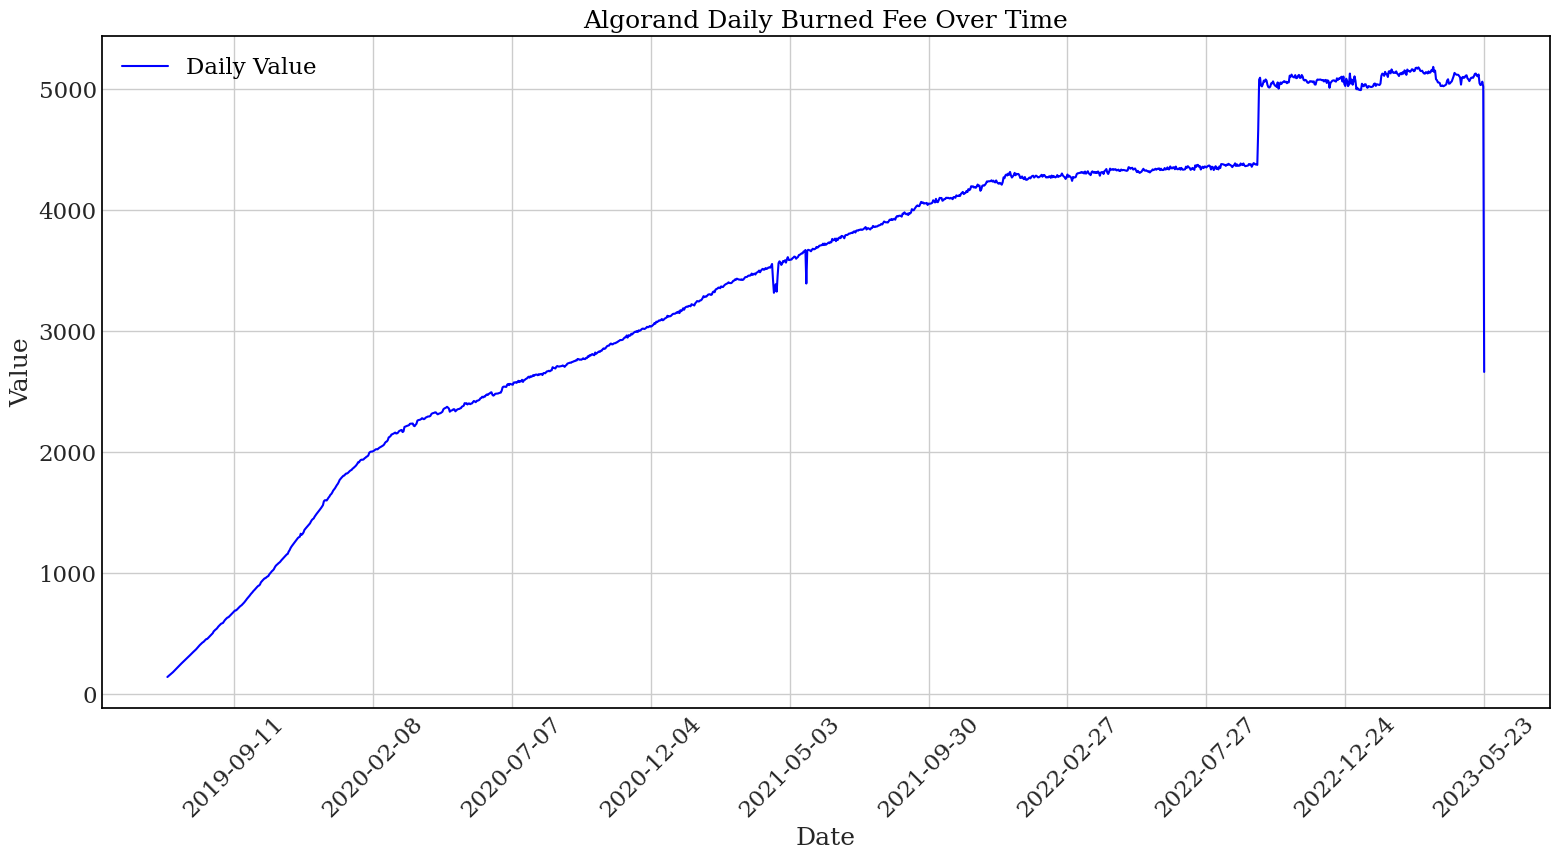

In [46]:
# Parse the 'Time' column
df['Date'] = df['Time'].apply(lambda x: json.loads(x)['time'])
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format

# Set the style to 'seaborn-white' for a clean look
plt.style.use('seaborn-white')
plt.rcParams.update({
    'font.family': 'DejaVu Serif',  # Set the font family to DejaVu Serif
    'font.size': 20,  # Set the font size to 20 for better readability
    'text.color': 'black',  # Ensure text color is black for better contrast
    'axes.facecolor': 'white',  # Set the axes background color to white
    'figure.facecolor': 'white',  # Set the figure background color to white
    'axes.edgecolor': 'black',  # Set the axes edge color to black
})

# Create the time series plot
plt.figure(figsize=(16, 9))
plt.plot(df['Date'], df['Value'], label='Daily Value', color='blue')

# Customize the plot
plt.title('Algorand Daily Burned Fee Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # Show only up to 15 major ticks

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and save
plt.tight_layout()
plt.savefig('Algorand_burned_fee.png', dpi=300)  # Adjust dpi for higher resolution
plt.show()

In [40]:
avg = df_5['141.059024'].mean()
avg

3401.8203982137834